In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.0f}'.format

In [ ]:
df = pd.read_excel('/content/Committee Public Database_Release.xlsx')

In [ ]:
df
df=df.drop(3483)

In [ ]:
df.describe()

,AWARD ID,TOTAL AWARD FUNDING AMOUNT,AWARD ACTION DATE,PERFORMANCE START DATE,PERFORMANCE END DATE
count,3483,3483,3483,3483,3483
mean,2254990,591076,2023-01-31 09:42:56.744185856,2023-03-07 20:28:19.224806144,2026-02-03 11:10:35.658914816
min,2033452,100,2021-03-09 00:00:00,2021-04-15 00:00:00,2022-04-30 00:00:00
25%,2215169,149990,2022-07-26 00:00:00,2022-09-01 00:00:00,2025-01-31 00:00:00
50%,2240360,323992,2023-03-09 00:00:00,2023-04-15 00:00:00,2025-12-31 00:00:00
75%,2317548,592290,2023-08-08 00:00:00,2023-09-01 00:00:00,2027-01-31 00:00:00
max,2423820,29399996,2024-03-15 00:00:00,2025-03-01 00:00:00,2030-02-28 00:00:00
std,68673,1228125,NaN,NaN,NaN


In [ ]:
for i in df.columns:
  print(i)

AWARD ID
USASPENDING LINK
TOTAL AWARD FUNDING AMOUNT
RECIPIENT TYPE
RECIPIENT NAME
RECIPIENT PARENT NAME
RECIPIENT STATE
RECIPIENT STATE OF PERFORMANCE
STATUS CATEGORY
SOCIAL JUSTICE CATEGORY
RACE CATEGORY
GENDER CATEGORY
ENVIRONMENTAL JUSTICE CATEGORY
AWARD DESCRIPTIONS
AWARD ACTION DATE
PERFORMANCE START DATE
PERFORMANCE END DATE
RECIPIENT CITY
RECIPIENT CITY OF PERFORMANCE
RECIPIENT FOREIGN CITY
RECIPIENT FOREIGN CITY OF PERFORMANCE
RECIPIENT COUNTRY
RECIPIENT COUNTRY OF PERFORMANCE
NSF FUNDING OFFICE
NSF AWARD CATEGORY
NSF AWARD TYPE


#**Grants, Funding Total per Category**

In [ ]:
for i in ['STATUS','SOCIAL JUSTICE','RACE','GENDER','ENVIRONMENTAL JUSTICE']:
  print(i)
  print('Total Grants:', df[i+" CATEGORY"].value_counts().sum())
  print('Total Funding:', df['TOTAL AWARD FUNDING AMOUNT'].where(df[i+' CATEGORY']==i).sum())
  print()

STATUS
Total Grants: 3160
Total Funding: 1868758471.0

SOCIAL JUSTICE
Total Grants: 2585
Total Funding: 1625993527.0

RACE
Total Grants: 689
Total Funding: 415553741.0

GENDER
Total Grants: 1058
Total Funding: 521534206.0

ENVIRONMENTAL JUSTICE
Total Grants: 362
Total Funding: 268304915.0



In [ ]:
# numbers match up

# **Correlation between Categories**

In [ ]:
only_categories = df[['STATUS CATEGORY', 'SOCIAL JUSTICE CATEGORY', 'RACE CATEGORY', 'GENDER CATEGORY', 'ENVIRONMENTAL JUSTICE CATEGORY']]
only_categories

,STATUS CATEGORY,SOCIAL JUSTICE CATEGORY,RACE CATEGORY,GENDER CATEGORY,ENVIRONMENTAL JUSTICE CATEGORY
0,STATUS,SOCIAL JUSTICE,NaN,NaN,NaN
1,NaN,SOCIAL JUSTICE,RACE,NaN,NaN
2,NaN,SOCIAL JUSTICE,RACE,NaN,NaN
3,STATUS,NaN,NaN,GENDER,NaN
4,STATUS,SOCIAL JUSTICE,RACE,NaN,NaN
...,...,...,...,...,...
3478,NaN,SOCIAL JUSTICE,NaN,NaN,NaN
3479,STATUS,NaN,NaN,NaN,NaN
3480,NaN,NaN,NaN,GENDER,NaN
3481,STATUS,SOCIAL JUSTICE,NaN,NaN,NaN


In [ ]:
only_num = only_categories
only_num[[only_num.notna()]] = 1
only_num = only_num.fillna(0)

only_num

<ipython-input-175-087410bf92b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_num[[only_num.notna()]] = 1
<ipython-input-175-087410bf92b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_num[[only_num.notna()]] = 1
<ipython-input-175-087410bf92b5>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  only_num = only_num.fillna(0)


,STATUS CATEGORY,SOCIAL JUSTICE CATEGORY,RACE CATEGORY,GENDER CATEGORY,ENVIRONMENTAL JUSTICE CATEGORY
0,1,1,0,0,0
1,0,1,1,0,0
2,0,1,1,0,0
3,1,0,0,1,0
4,1,1,1,0,0
...,...,...,...,...,...
3478,0,1,0,0,0
3479,1,0,0,0,0
3480,0,0,0,1,0
3481,1,1,0,0,0


In [ ]:
# corr_matrix = only_num.corr()
# corr_matrix

In [ ]:
#sns.heatmap(corr_matrix, cmap="RdBu", annot=True, vmin=-1, vmax=1)
#count manually to check

# **Testing Claims**

## Three out of every four Status awards also incorporated Social Justice themes

In [ ]:
only_num[(only_num['STATUS CATEGORY']==1) & (only_num['SOCIAL JUSTICE CATEGORY']==1)].count()

,0
STATUS CATEGORY,2312
SOCIAL JUSTICE CATEGORY,2312
RACE CATEGORY,2312
GENDER CATEGORY,2312
ENVIRONMENTAL JUSTICE CATEGORY,2312


In [ ]:
only_num[(only_num['STATUS CATEGORY']==1)]

,STATUS CATEGORY,SOCIAL JUSTICE CATEGORY,RACE CATEGORY,GENDER CATEGORY,ENVIRONMENTAL JUSTICE CATEGORY
0,1,1,0,0,0
3,1,0,0,1,0
4,1,1,1,0,0
5,1,1,0,0,0
6,1,1,1,0,0
...,...,...,...,...,...
3476,1,1,0,0,0
3477,1,0,0,1,0
3479,1,0,0,0,0
3481,1,1,0,0,0


In [ ]:
2312/3160

0.7316455696202532

## Almost one-third of the Status awards involved Gender topics.

In [ ]:
only_num[(only_num['STATUS CATEGORY']==1) & (only_num['GENDER CATEGORY']==1)].count()

,0
STATUS CATEGORY,981
SOCIAL JUSTICE CATEGORY,981
RACE CATEGORY,981
GENDER CATEGORY,981
ENVIRONMENTAL JUSTICE CATEGORY,981


In [ ]:
981/3160

0.31044303797468353

## Race issues were incorporated into 18% of the Status awards,

In [ ]:
only_num[(only_num['STATUS CATEGORY']==1) & (only_num['RACE CATEGORY']==1)].count()

,0
STATUS CATEGORY,583
SOCIAL JUSTICE CATEGORY,583
RACE CATEGORY,583
GENDER CATEGORY,583
ENVIRONMENTAL JUSTICE CATEGORY,583


In [ ]:
583/3160

0.18449367088607596

## 10% of those grants included Environmental Justice topics

In [ ]:
only_num[(only_num['STATUS CATEGORY']==1) & (only_num['ENVIRONMENTAL JUSTICE CATEGORY']==1)].count()

,0
STATUS CATEGORY,310
SOCIAL JUSTICE CATEGORY,310
RACE CATEGORY,310
GENDER CATEGORY,310
ENVIRONMENTAL JUSTICE CATEGORY,310


In [ ]:
310/3160

0.0981012658227848

# **Frequency Visualizations**

In [ ]:
df.head()

,AWARD ID,USASPENDING LINK,TOTAL AWARD FUNDING AMOUNT,RECIPIENT TYPE,RECIPIENT NAME,RECIPIENT PARENT NAME,RECIPIENT STATE,RECIPIENT STATE OF PERFORMANCE,STATUS CATEGORY,SOCIAL JUSTICE CATEGORY,...,PERFORMANCE END DATE,RECIPIENT CITY,RECIPIENT CITY OF PERFORMANCE,RECIPIENT FOREIGN CITY,RECIPIENT FOREIGN CITY OF PERFORMANCE,RECIPIENT COUNTRY,RECIPIENT COUNTRY OF PERFORMANCE,NSF FUNDING OFFICE,NSF AWARD CATEGORY,NSF AWARD TYPE
0,2211032,https://www.usaspending.gov/award/ASST_NON_221...,148507,PUBLIC/STATE CONTROLLED INSTITUTION OF HIGHER ...,"UNIVERSITY OF TEXAS AT SAN ANTONIO, THE",UNIVERSITY OF TEXAS SYSTEM,TEXAS,TEXAS,STATUS,SOCIAL JUSTICE,...,2022-07-31,SAN ANTONIO,SAN ANTONIO,NaN,NaN,UNITED STATES,UNITED STATES,DIVISION OF ENGINEERING EDUCATION,"41.0: Grants, subsidies, and contributions",PROJECT GRANT (B)
1,2133577,https://www.usaspending.gov/award/ASST_NON_213...,88565,PRIVATE INSTITUTION OF HIGHER EDUCATION,DREXEL UNIVERSITY,DREXEL UNIVERSITY,PENNSYLVANIA,PENNSYLVANIA,NaN,SOCIAL JUSTICE,...,2022-08-31,PHILADELPHIA,PHILADELPHIA,NaN,NaN,UNITED STATES,UNITED STATES,DIV OF RESEARCH ON LEARNING IN,"41.0: Grants, subsidies, and contributions",PROJECT GRANT (B)
2,2141578,https://www.usaspending.gov/award/ASST_NON_214...,49999,PUBLIC/STATE CONTROLLED INSTITUTION OF HIGHER ...,UNIVERSITY OF TEXAS AT AUSTIN,UNIVERSITY OF TEXAS SYSTEM,TEXAS,TEXAS,NaN,SOCIAL JUSTICE,...,2022-09-30,AUSTIN,AUSTIN,NaN,NaN,UNITED STATES,UNITED STATES,DIVISION OF UNDERGRADUATE EDUCATION,"41.0: Grants, subsidies, and contributions",PROJECT GRANT (B)
3,2317250,https://www.usaspending.gov/award/ASST_NON_231...,88870,PRIVATE INSTITUTION OF HIGHER EDUCATION,"ADMINISTRATORS OF THE TULANE EDUCATIONAL FUND,...","ADMINISTRATORS OF THE TULANE EDUCATIONAL FUND,...",LOUISIANA,LOUISIANA,STATUS,NaN,...,2026-12-31,NEW ORLEANS,NEW ORLEANS,NaN,NaN,UNITED STATES,UNITED STATES,OFFICE OF INTEGRATIVE ACTIVITIES,"41.0: Grants, subsidies, and contributions",PROJECT GRANT (B)
4,2205648,https://www.usaspending.gov/award/ASST_NON_220...,110000,FOR-PROFIT ORGANIZATION (OTHER THAN SMALL BUSI...,NATIONAL ACADEMY OF SCIENCES,NATIONAL ACADEMY OF SCIENCES,DISTRICT OF COLUMBIA,DISTRICT OF COLUMBIA,STATUS,SOCIAL JUSTICE,...,2023-02-28,WASHINGTON,WASHINGTON,NaN,NaN,UNITED STATES,UNITED STATES,OFFICE OF EMERGING FRONTIERS AND,"41.0: Grants, subsidies, and contributions",PROJECT GRANT (B)


In [ ]:
df.shape

(3483, 26)

In [ ]:
df.sort_values('TOTAL AWARD FUNDING AMOUNT', ascending=False)

,AWARD ID,USASPENDING LINK,TOTAL AWARD FUNDING AMOUNT,RECIPIENT TYPE,RECIPIENT NAME,RECIPIENT PARENT NAME,RECIPIENT STATE,RECIPIENT STATE OF PERFORMANCE,STATUS CATEGORY,SOCIAL JUSTICE CATEGORY,...,PERFORMANCE END DATE,RECIPIENT CITY,RECIPIENT CITY OF PERFORMANCE,RECIPIENT FOREIGN CITY,RECIPIENT FOREIGN CITY OF PERFORMANCE,RECIPIENT COUNTRY,RECIPIENT COUNTRY OF PERFORMANCE,NSF FUNDING OFFICE,NSF AWARD CATEGORY,NSF AWARD TYPE
344,2320345,https://www.usaspending.gov/award/ASST_NON_232...,29399996,PUBLIC/STATE CONTROLLED INSTITUTION OF HIGHER ...,UNIVERSITY OF ILLINOIS,UNIVERSITY OF ILLINOIS,ILLINOIS,ILLINOIS,STATUS,SOCIAL JUSTICE,...,2024-08-31,URBANA,URBANA,NaN,NaN,UNITED STATES,UNITED STATES,OFC OF ADV CYBERINFRASTRUCTURE,"41.0: Grants, subsidies, and contributions",COOPERATIVE AGREEMENT (B)
2401,2138307,https://www.usaspending.gov/award/ASST_NON_213...,20059355,PUBLIC/STATE CONTROLLED INSTITUTION OF HIGHER ...,UNIVERSITY OF ILLINOIS,UNIVERSITY OF ILLINOIS,ILLINOIS,ILLINOIS,STATUS,SOCIAL JUSTICE,...,2027-04-30,URBANA,URBANA,NaN,NaN,UNITED STATES,UNITED STATES,OFC OF ADV CYBERINFRASTRUCTURE,"41.0: Grants, subsidies, and contributions",COOPERATIVE AGREEMENT (B)
1328,2315695,https://www.usaspending.gov/award/ASST_NON_231...,15000000,PUBLIC/STATE CONTROLLED INSTITUTION OF HIGHER ...,RESEARCH FOUNDATION FOR THE STATE UNIVERSITY O...,RESEARCH FOUNDATION FOR THE STATE UNIVERSITY O...,NEW YORK,NEW YORK,NaN,SOCIAL JUSTICE,...,2026-02-28,BINGHAMTON,BINGHAMTON,NaN,NaN,UNITED STATES,UNITED STATES,INNOVATION AND TECHNOLOGY ECOSYSTEMS,"41.0: Grants, subsidies, and contributions",COOPERATIVE AGREEMENT (B)
1316,2315727,https://www.usaspending.gov/award/ASST_NON_231...,15000000,PUBLIC/STATE CONTROLLED INSTITUTION OF HIGHER ...,LOUISIANA STATE UNIVERSITY,LOUISIANA STATE UNIVERSITY,LOUISIANA,LOUISIANA,STATUS,SOCIAL JUSTICE,...,2026-02-28,BATON ROUGE,BATON ROUGE,NaN,NaN,UNITED STATES,UNITED STATES,INNOVATION AND TECHNOLOGY ECOSYSTEMS,"41.0: Grants, subsidies, and contributions",COOPERATIVE AGREEMENT (B)
1317,2315315,https://www.usaspending.gov/award/ASST_NON_231...,15000000,PUBLIC/STATE CONTROLLED INSTITUTION OF HIGHER ...,NORTH DAKOTA STATE UNIVERSITY,NORTH DAKOTA STATE UNIVERSITY,NORTH DAKOTA,NORTH DAKOTA,STATUS,SOCIAL JUSTICE,...,2026-02-28,FARGO,FARGO,NaN,NaN,UNITED STATES,UNITED STATES,INNOVATION AND TECHNOLOGY ECOSYSTEMS,"41.0: Grants, subsidies, and contributions",COOPERATIVE AGREEMENT (B)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,2230504,https://www.usaspending.gov/award/ASST_NON_223...,1650,PRIVATE INSTITUTION OF HIGHER EDUCATION,LAFAYETTE COLLEGE,LAFAYETTE COLLEGE,PENNSYLVANIA,PENNSYLVANIA,STATUS,SOCIAL JUSTICE,...,2022-12-31,EASTON,EASTON,NaN,NaN,UNITED STATES,UNITED STATES,DIV OF INFOR INTELLIGENT SYSTEMS,"41.0: Grants, subsidies, and contributions",PROJECT GRANT (B)
2061,2311140,https://www.usaspending.gov/award/ASST_NON_231...,1502,PUBLIC/STATE CONTROLLED INSTITUTION OF HIGHER ...,THE REGENTS OF THE UNIVERSITY OF COLORADO,THE REGENTS OF THE UNIVERSITY OF COLORADO,COLORADO,COLORADO,STATUS,SOCIAL JUSTICE,...,2023-08-31,BOULDER,BOULDER,NaN,NaN,UNITED STATES,UNITED STATES,OFC OF ADV CYBERINFRASTRUCTURE,"41.0: Grants, subsidies, and contributions",PROJECT GRANT (B)
1556,2401696,https://www.usaspending.gov/award/ASST_NON_240...,914,PUBLIC/STATE CONTROLLED INSTITUTION OF HIGHER ...,REGENTS OF THE UNIVERSITY OF MINNESOTA,NaN,MINNESOTA,MINNESOTA,STATUS,SOCIAL JUSTICE,...,2024-03-31,MINNEAPOLIS,MINNEAPOLIS,NaN,NaN,UNITED STATES,UNITED STATES,DIV OF INFOR INTELLIGENT SYSTEMS,"41.0: Grants, subsidies, and contributions",PROJECT GRANT (B)
25,2317570,https://www.usaspending.gov/award/ASST_NON_231...,100,OTHER,AMERICAN INSTITUTE OF MATHEMATICS,NaN,CALIFORNIA,CALIFORNIA,STATUS,NaN,...,2026-12-31,SAN JOSE,SAN JOSE,NaN,NaN,UNITED STATES,UNITED STATES,DIVISION OF MATHEMATICAL SCIENCES,"41.0: Grants, subsidies, and contributions",PROJECT GRANT (B)


# **Histograms**

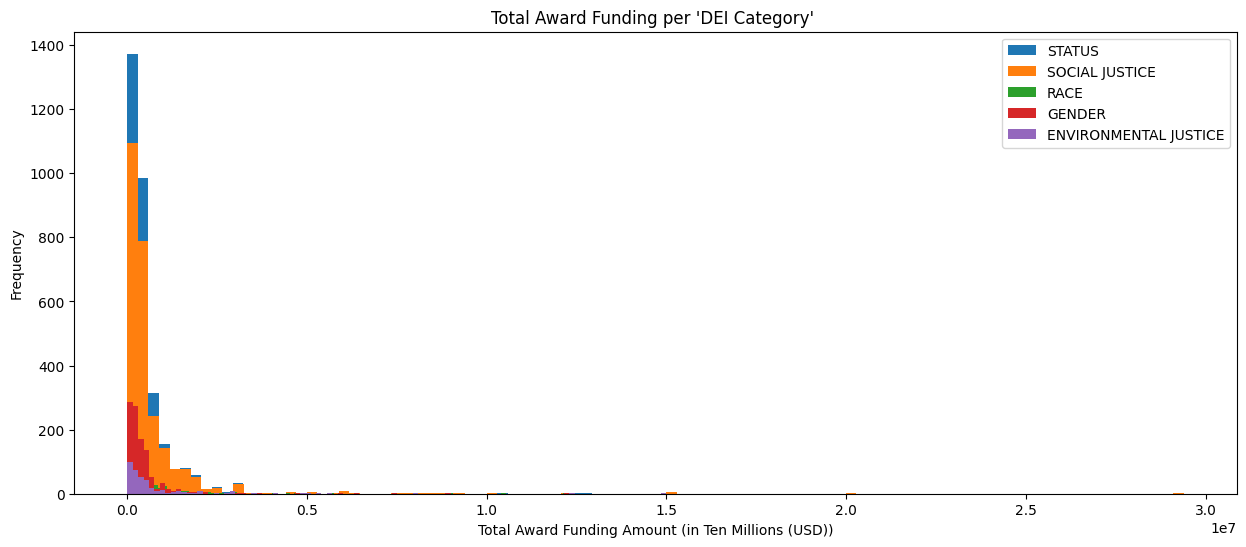

In [ ]:

plt.figure(figsize=(15,6))


for i in ['STATUS','SOCIAL JUSTICE','RACE','GENDER','ENVIRONMENTAL JUSTICE']:
  df['TOTAL AWARD FUNDING AMOUNT'].where(df[i+' CATEGORY']==i).plot.hist(label=i,
                                                                          bins=100, xlabel='Total Award Funding Amount (in Ten Millions (USD))')

plt.title("Total Award Funding per 'DEI Category' ")
plt.legend()

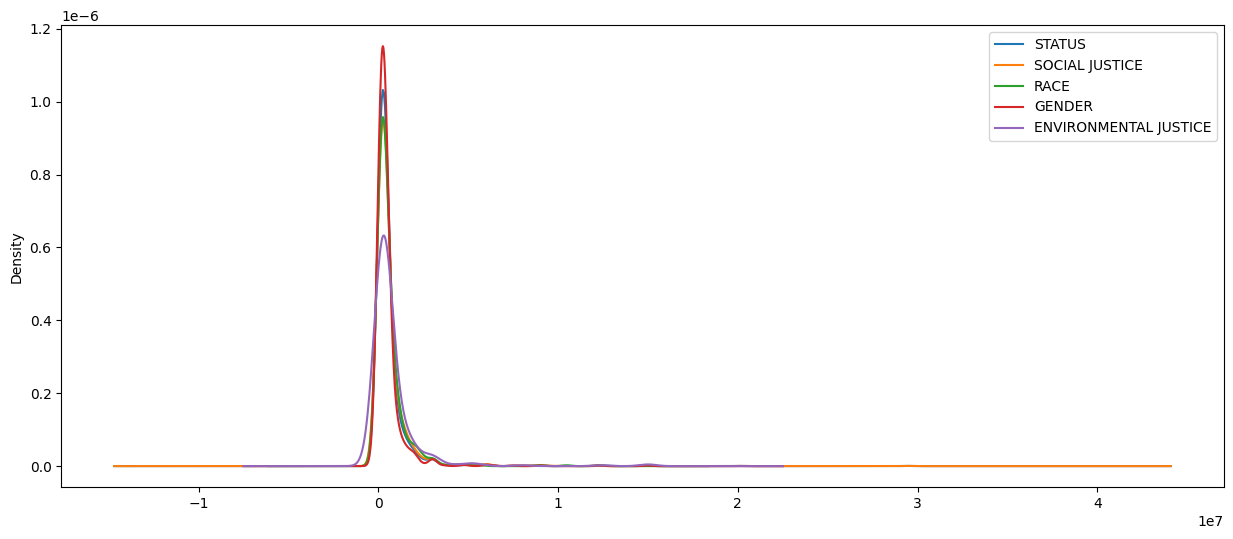

In [ ]:

plt.figure(figsize=(15,6))


for i in ['STATUS','SOCIAL JUSTICE','RACE','GENDER','ENVIRONMENTAL JUSTICE']:
  df['TOTAL AWARD FUNDING AMOUNT'].where(df[i+' CATEGORY']==i).plot.density(label=i)

plt.legend()


# **Boxplots**

In [ ]:

grouped_category = df.groupby(['STATUS CATEGORY','SOCIAL JUSTICE CATEGORY','RACE CATEGORY','GENDER CATEGORY','ENVIRONMENTAL JUSTICE CATEGORY'])

cat_and_amt = df[['STATUS CATEGORY', 'SOCIAL JUSTICE CATEGORY', 'RACE CATEGORY', 'GENDER CATEGORY', 'ENVIRONMENTAL JUSTICE CATEGORY','TOTAL AWARD FUNDING AMOUNT']]
#print(cat_and_amt)


#sum of total award funding amount based on each category not being NA


for i in ['STATUS','SOCIAL JUSTICE','RACE','GENDER','ENVIRONMENTAL JUSTICE']:
  print(i)
  print(cat_and_amt[['TOTAL AWARD FUNDING AMOUNT']].where(cat_and_amt[i+' CATEGORY'].notna()).describe())
  print()


STATUS
       TOTAL AWARD FUNDING AMOUNT
count                        3160
mean                       591379
std                       1230665
min                           100
25%                        150000
50%                        324184
75%                        592569
max                      29399996

SOCIAL JUSTICE
       TOTAL AWARD FUNDING AMOUNT
count                        2585
mean                       629011
std                       1296110
min                           914
25%                        149954
50%                        340000
75%                        600482
max                      29399996

RACE
       TOTAL AWARD FUNDING AMOUNT
count                         689
mean                       603126
std                        963625
min                           100
25%                        159222
50%                        323674
75%                        657685
max                      12244454

GENDER
       TOTAL AWARD FUNDING AMOUNT
count      

In [ ]:
  print('iqr race q3-q1 -->', 657685-159222)
  print('top bound race: q3 + iqr*1.5 --> ', 657685+(498463*1.5))


iqr race q3-q1 --> 498463
top bound race: q3 + iqr*1.5 -->  1405379.5


In [ ]:
graphing=pd.concat([only_num, df['TOTAL AWARD FUNDING AMOUNT']], axis=1)

graphing


,STATUS CATEGORY,SOCIAL JUSTICE CATEGORY,RACE CATEGORY,GENDER CATEGORY,ENVIRONMENTAL JUSTICE CATEGORY,TOTAL AWARD FUNDING AMOUNT
0,1,1,0,0,0,148507
1,0,1,1,0,0,88565
2,0,1,1,0,0,49999
3,1,0,0,1,0,88870
4,1,1,1,0,0,110000
...,...,...,...,...,...,...
3478,0,1,0,0,0,130213
3479,1,0,0,0,0,315000
3480,0,0,0,1,0,25200
3481,1,1,0,0,0,774472


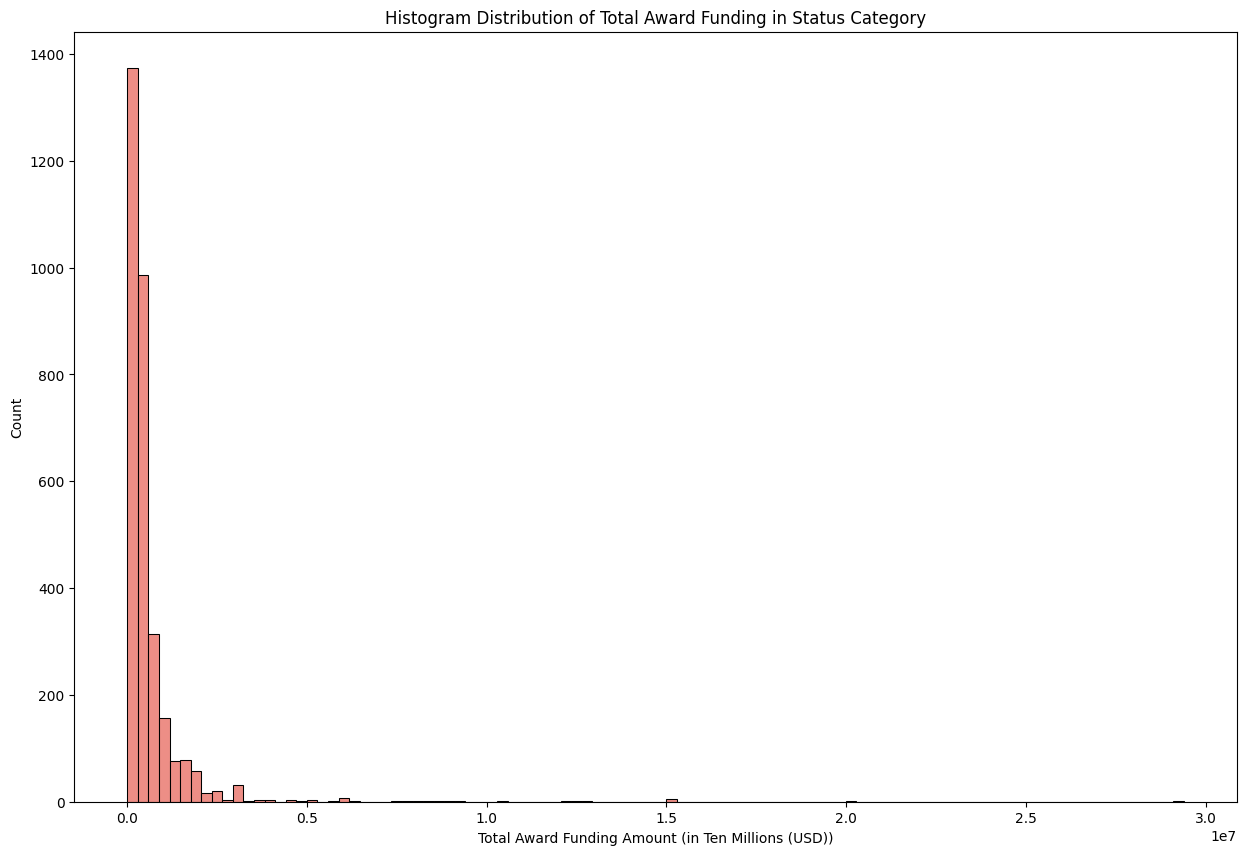

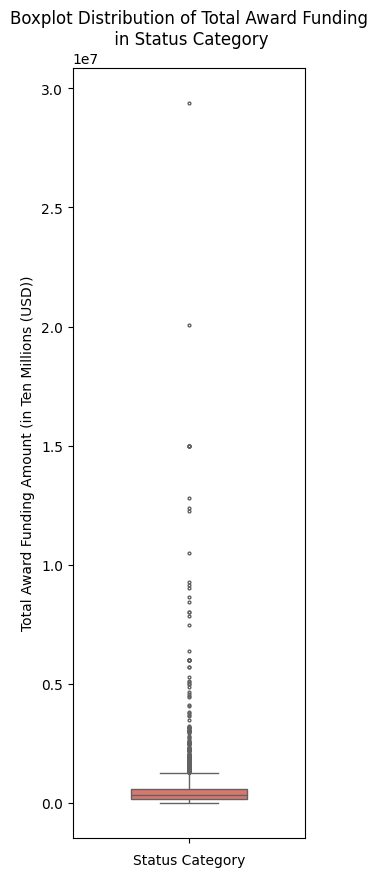

In [ ]:
plt.figure(figsize=(15, 10))

status_hist = sns.histplot(x=graphing["TOTAL AWARD FUNDING AMOUNT"].where(graphing['STATUS CATEGORY']==1),

                           color="#e8685d",
                           bins=100)
status_hist.set_xlabel('Total Award Funding Amount (in Ten Millions (USD))')
status_hist.set_title('Histogram Distribution of Total Award Funding in Status Category')

plt.show()


plt.figure(figsize=(3, 10))



status_box = sns.boxplot(y=graphing["TOTAL AWARD FUNDING AMOUNT"].where(graphing['STATUS CATEGORY']==1), width=.5, color="#e8685d",
                         fliersize=2
                         )
status_box.set_title('Boxplot Distribution of Total Award Funding\n in Status Category')

status_box.set_ylabel('Total Award Funding Amount (in Ten Millions (USD))')
status_box.set_xlabel('Status Category')


plt.show()

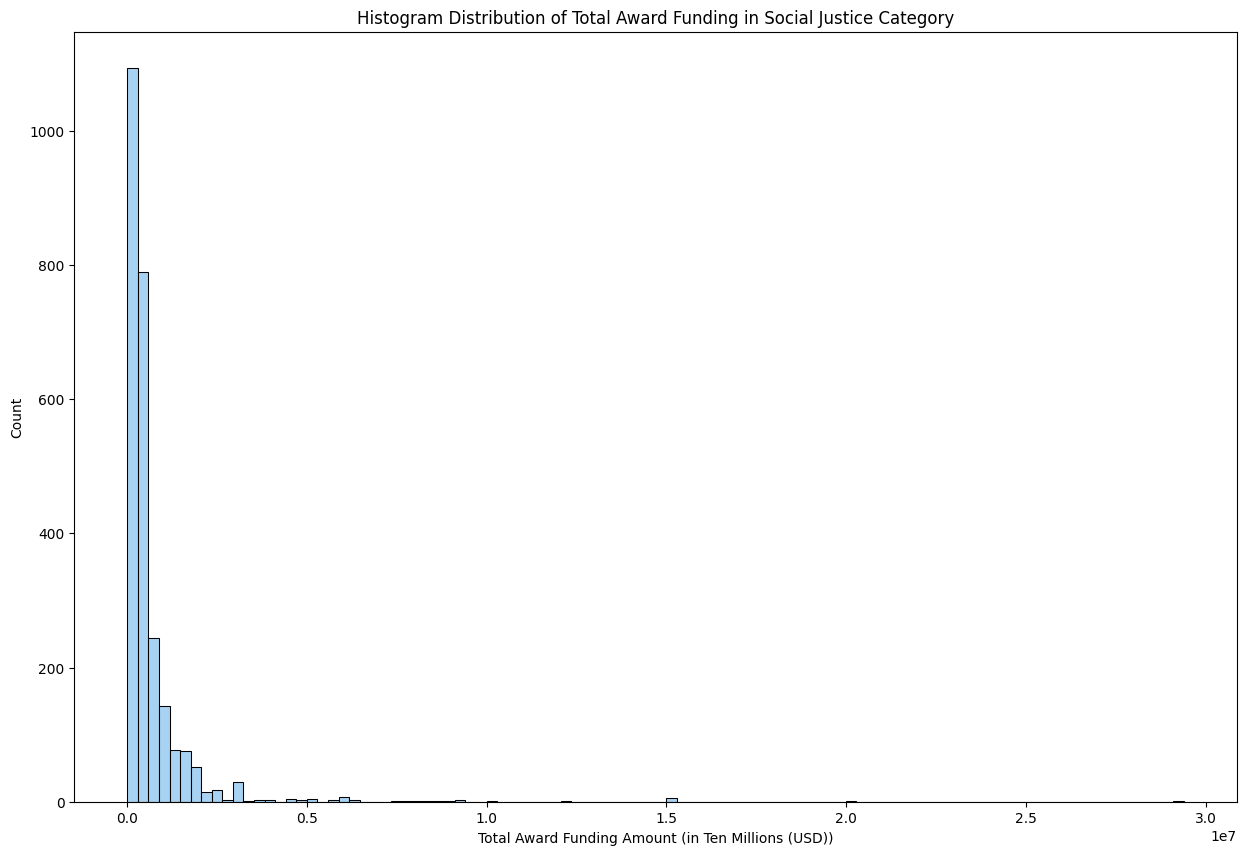

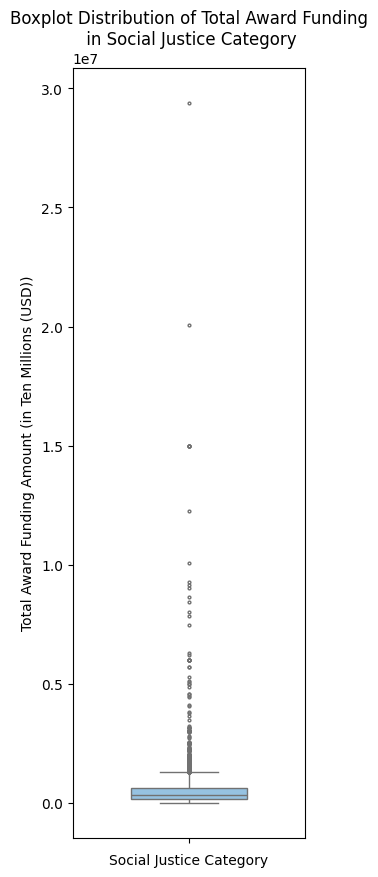

In [ ]:

plt.figure(figsize=(15, 10))

socialjustice_hist = sns.histplot(data=df, x=graphing["TOTAL AWARD FUNDING AMOUNT"].where(graphing['SOCIAL JUSTICE CATEGORY']==1),
                                  color="#8ac4ed",
                            bins=100)
socialjustice_hist.set_title('Histogram Distribution of Total Award Funding in Social Justice Category')

socialjustice_hist.set_xlabel('Total Award Funding Amount (in Ten Millions (USD))')


plt.show()


plt.figure(figsize=(3, 10))

socialjustice_box = sns.boxplot(y=graphing["TOTAL AWARD FUNDING AMOUNT"].where(graphing['SOCIAL JUSTICE CATEGORY']==1),
                                width=.5, color="#8ac4ed", fliersize=2)
socialjustice_box.set_ylabel('Total Award Funding Amount (in Ten Millions (USD))')
socialjustice_box.set_xlabel('Social Justice Category')
socialjustice_box.set_title('Boxplot Distribution of Total Award Funding\n in Social Justice Category')


plt.show()


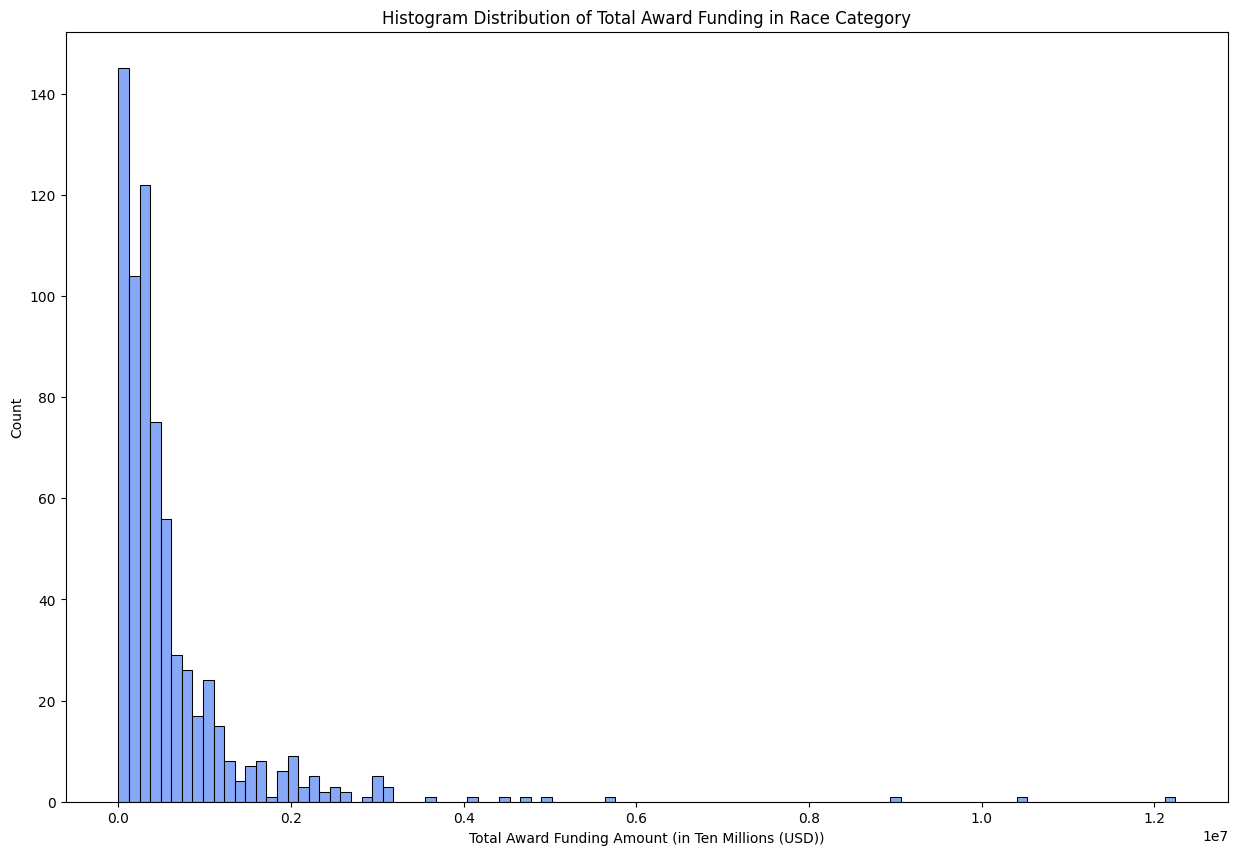

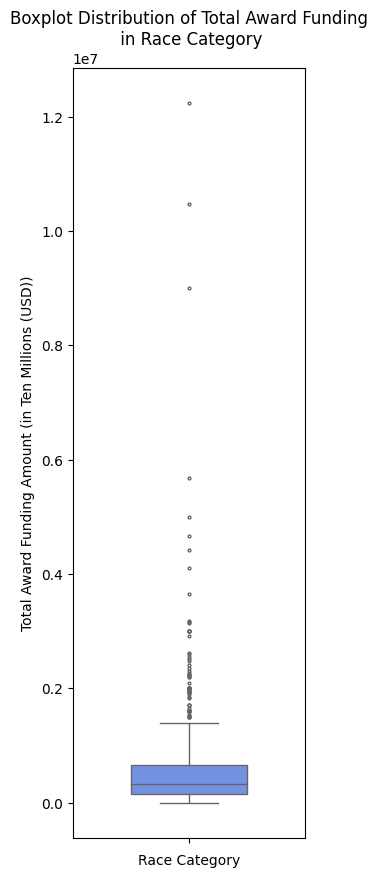

In [ ]:
plt.figure(figsize=(15, 10))

race_hist = sns.histplot(data=df, x=graphing["TOTAL AWARD FUNDING AMOUNT"].where(graphing['RACE CATEGORY']==1),
                                  color="#5f8af5",
                           bins=100)

race_hist.set_title('Histogram Distribution of Total Award Funding in Race Category')

race_hist.set_xlabel('Total Award Funding Amount (in Ten Millions (USD))')

plt.show()



plt.figure(figsize=(3, 10))

race_box = sns.boxplot(y=graphing["TOTAL AWARD FUNDING AMOUNT"].where(graphing['RACE CATEGORY']==1),
                       width=.5, color="#5f8af5", fliersize=2)

race_box.set_title('Boxplot Distribution of Total Award Funding\n in Race Category')
race_box.set_ylabel('Total Award Funding Amount (in Ten Millions (USD))')
race_box.set_xlabel('Race Category')

plt.show()


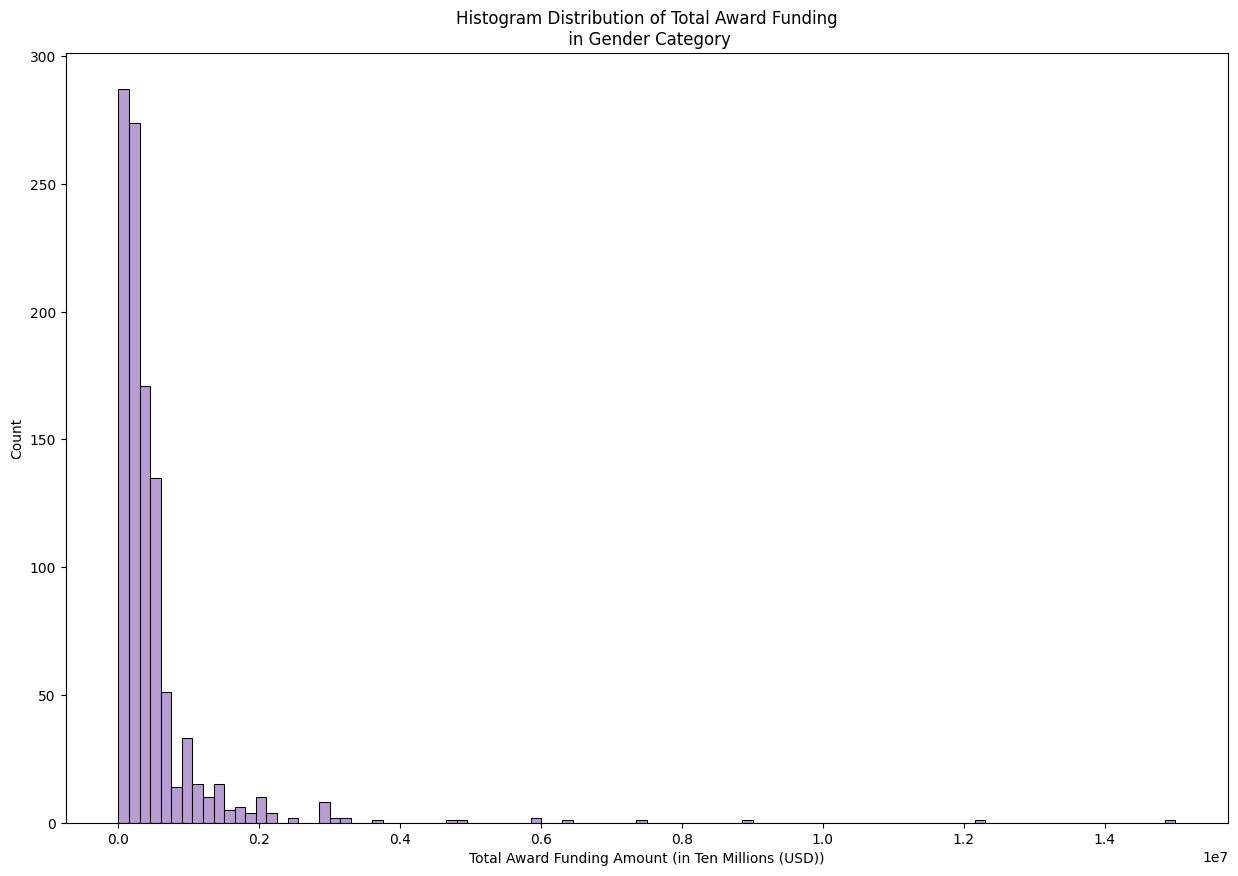

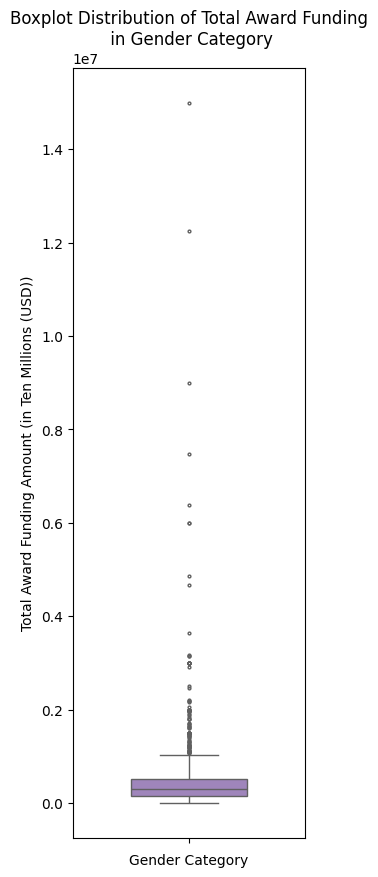

In [ ]:
plt.figure(figsize=(15, 10))

gender_hist = sns.histplot(data=df, x=graphing["TOTAL AWARD FUNDING AMOUNT"].where(graphing['GENDER CATEGORY']==1),
                                  color="#9f7cc4",
                           bins=100)

gender_hist.set_xlabel('Total Award Funding Amount (in Ten Millions (USD))')
gender_hist.set_title('Histogram Distribution of Total Award Funding\n in Gender Category')

plt.show()



plt.figure(figsize=(3, 10))

gender_box = sns.boxplot(y=graphing["TOTAL AWARD FUNDING AMOUNT"].where(graphing['GENDER CATEGORY']==1),
                         width=.5, color="#9f7cc4", fliersize=2)
gender_box.set_title('Boxplot Distribution of Total Award Funding\n in Gender Category')

gender_box.set_ylabel('Total Award Funding Amount (in Ten Millions (USD))')
gender_box.set_xlabel('Gender Category')


plt.show()


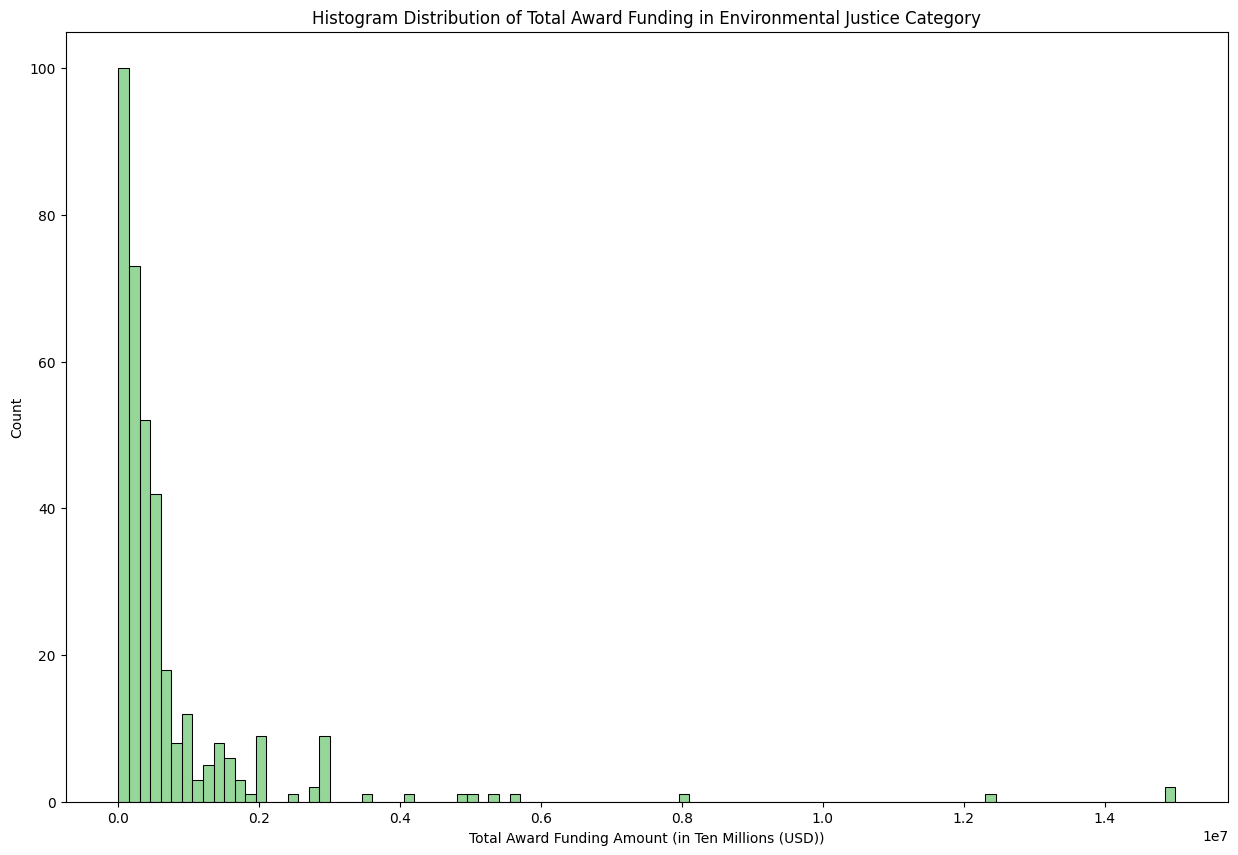

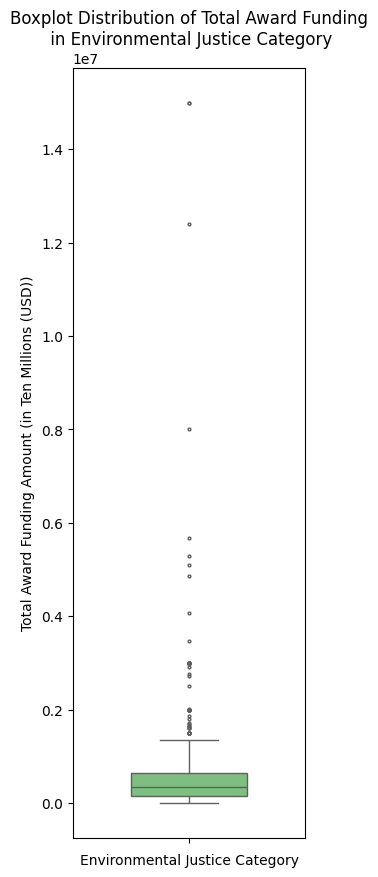

In [ ]:
plt.figure(figsize=(15, 10))


environmentaljustice_hist = sns.histplot(data=df, x=graphing["TOTAL AWARD FUNDING AMOUNT"].where(graphing['ENVIRONMENTAL JUSTICE CATEGORY']==1),
                                  color="#73c977",
                           bins=100)
environmentaljustice_hist.set_title('Histogram Distribution of Total Award Funding in Environmental Justice Category')

environmentaljustice_hist.set_xlabel('Total Award Funding Amount (in Ten Millions (USD))')


plt.show()


plt.figure(figsize=(3, 10))

environmentaljustice_box = sns.boxplot(y=graphing["TOTAL AWARD FUNDING AMOUNT"].where(graphing['ENVIRONMENTAL JUSTICE CATEGORY']==1),
                         width=.5, color="#73c977", fliersize=2)

environmentaljustice_box.set_title('Boxplot Distribution of Total Award Funding\n in Environmental Justice Category')

environmentaljustice_box.set_ylabel('Total Award Funding Amount (in Ten Millions (USD))')
environmentaljustice_box.set_xlabel('Environmental Justice Category')

plt.show()


Text(0.5, 1.0, 'Boxplot Distribution of Total Award Funding\n per Category')

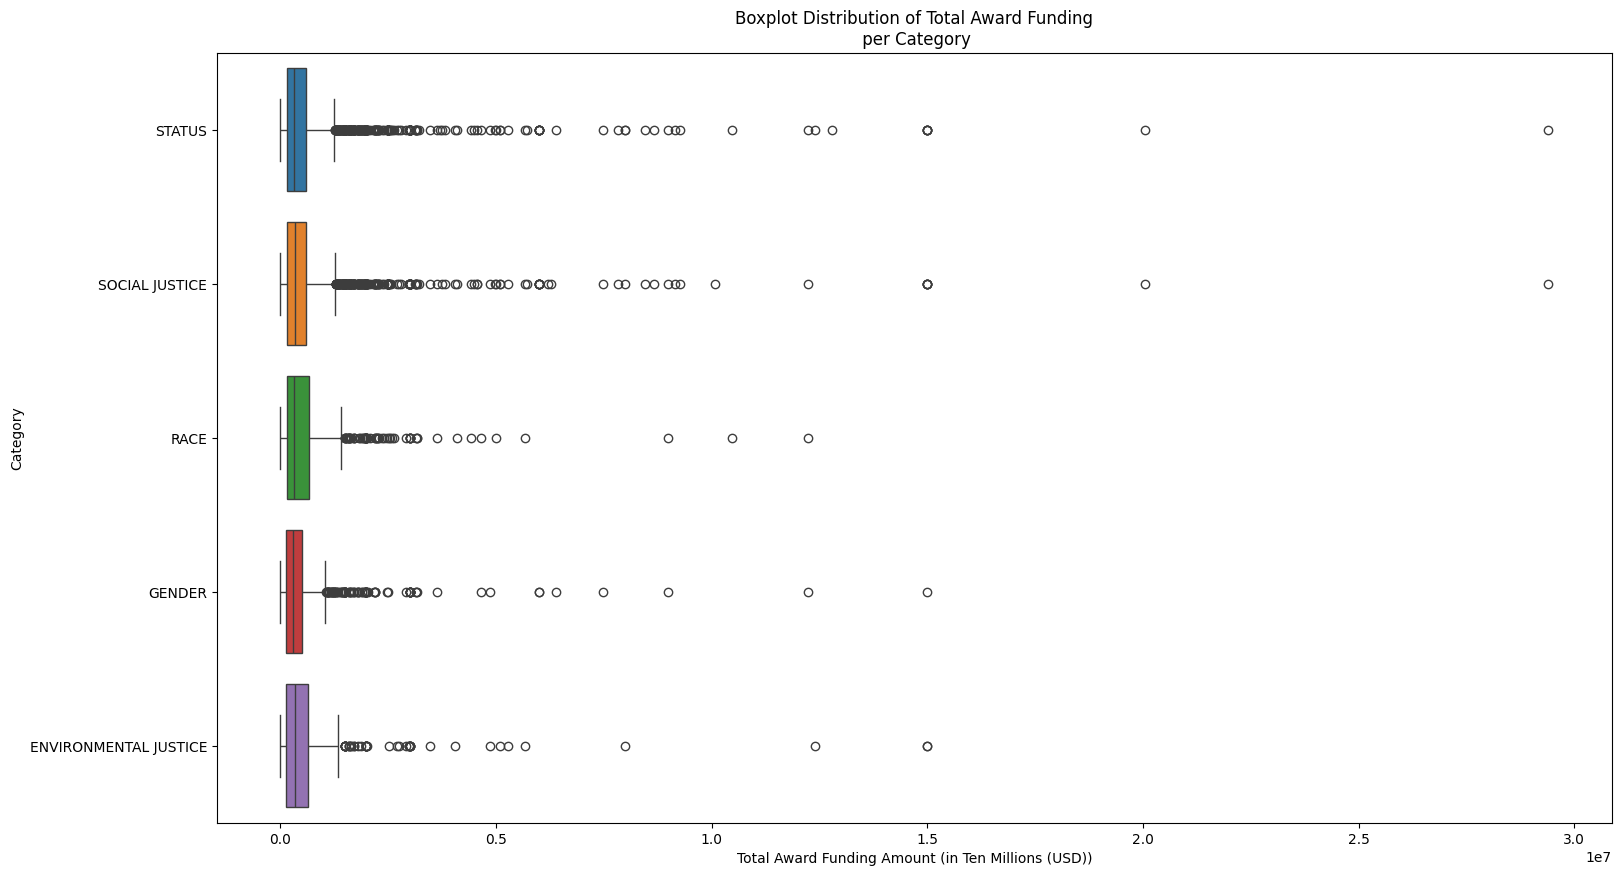

In [ ]:
tempstatus = {'CATEGORY':'STATUS',
              'FUNDING': graphing["TOTAL AWARD FUNDING AMOUNT"].where(graphing['STATUS CATEGORY']==1)}
tempsj= {'CATEGORY':'SOCIAL JUSTICE',
         'FUNDING': graphing["TOTAL AWARD FUNDING AMOUNT"].where(graphing['SOCIAL JUSTICE CATEGORY']==1)}
temprace={'CATEGORY':'RACE',
          'FUNDING':graphing["TOTAL AWARD FUNDING AMOUNT"].where(graphing['RACE CATEGORY']==1)}
tempgender={'CATEGORY':'GENDER',
            'FUNDING':graphing["TOTAL AWARD FUNDING AMOUNT"].where(graphing['GENDER CATEGORY']==1)}
tempenv={'CATEGORY':'ENVIRONMENTAL JUSTICE',
         'FUNDING':graphing["TOTAL AWARD FUNDING AMOUNT"].where(graphing['ENVIRONMENTAL JUSTICE CATEGORY']==1)}

tempstatus = pd.DataFrame(tempstatus)
tempsj = pd.DataFrame(tempsj)
temprace = pd.DataFrame(temprace)
tempgender = pd.DataFrame(tempgender)
tempenv = pd.DataFrame(tempenv)

tempdata = pd.concat([tempstatus, tempsj, temprace, tempgender, tempenv], ignore_index=True)

#tempdata

plt.figure(figsize=(18, 10))

temp_box = sns.boxplot(x=tempdata["FUNDING"], y=tempdata['CATEGORY'], hue=tempdata['CATEGORY'])

temp_box.set_xlabel('Total Award Funding Amount (in Ten Millions (USD))')
temp_box.set_ylabel('Category')
temp_box.set_title('Boxplot Distribution of Total Award Funding\n per Category')


Text(0.5, 1.0, 'Boxplot Distribution of Total Award Funding\n per Category, without Outliers')

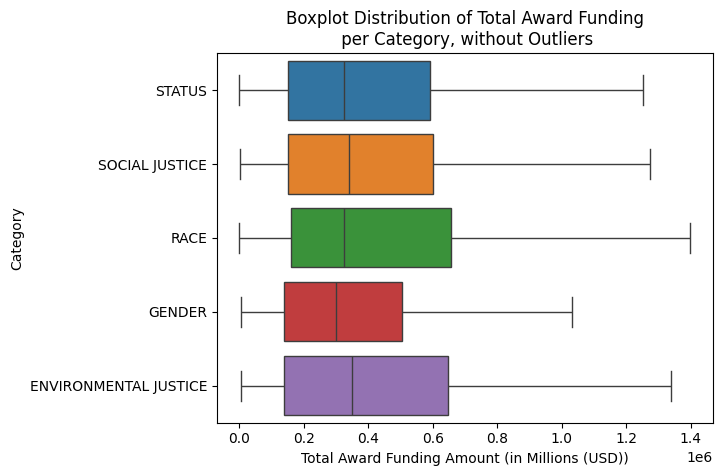

In [ ]:
temp_box_nofliers = sns.boxplot(x=tempdata["FUNDING"], y=tempdata['CATEGORY'], hue=tempdata['CATEGORY'],
                       showfliers=False)
temp_box_nofliers.set_xlabel('Total Award Funding Amount (in Millions (USD))')
temp_box_nofliers.set_ylabel('Category')
temp_box_nofliers.set_title('Boxplot Distribution of Total Award Funding\n per Category, without Outliers')


# **Describe Recipients**

In [ ]:
print(df.groupby('RECIPIENT TYPE', dropna=False).describe()['TOTAL AWARD FUNDING AMOUNT'])

                                                    count    mean     min  \
RECIPIENT TYPE                                                              
FOR-PROFIT ORGANIZATION (OTHER THAN SMALL BUSIN...    163  515217     100   
INDIAN/NATIVE AMERICAN TRIBAL DESIGNATED ORGANI...      2 2016970 1942076   
INDIVIDUAL                                             82  197534   51750   
NON-DOMESTIC (NON-U.S.) ENTITY                          2  583334  300000   
OTHER                                                 107  978237     100   
PRIVATE INSTITUTION OF HIGHER EDUCATION               798  560659    1650   
PUBLIC/STATE CONTROLLED INSTITUTION OF HIGHER E...   2293  602229     914   
SMALL BUSINESS                                         36  565265   49500   

                                                       25%     50%     75%  \
RECIPIENT TYPE                                                               
FOR-PROFIT ORGANIZATION (OTHER THAN SMALL BUSIN...   46665  199657  49990

In [ ]:
print(df.groupby('RECIPIENT NAME', dropna=False).count()['TOTAL AWARD FUNDING AMOUNT'].sort_values(ascending=False).head(25))

RECIPIENT NAME
REDACTED DUE TO PII                                              82
REGENTS OF THE UNIVERSITY OF MICHIGAN                            52
THE REGENTS OF THE UNIVERSITY OF COLORADO                        51
PURDUE UNIVERSITY                                                45
UNIVERSITY OF WASHINGTON                                         44
ARIZONA STATE UNIVERSITY                                         43
THE PENNSYLVANIA STATE UNIVERSITY                                43
RESEARCH FOUNDATION FOR THE STATE UNIVERSITY OF NEW YORK, THE    38
MICHIGAN STATE UNIVERSITY                                        38
UNIVERSITY OF TEXAS AT AUSTIN                                    36
VIRGINIA POLYTECHNIC INSTITUTE & STATE UNIVERSITY                36
UNIVERSITY OF WISCONSIN SYSTEM                                   34
RESEARCH FOUNDATION OF THE CITY UNIVERSITY OF NEW YORK           33
REGENTS OF THE UNIVERSITY OF MINNESOTA                           33
UNIVERSITY OF ILLINOIS           

In [ ]:
print(df.groupby('RECIPIENT NAME', dropna=False)['TOTAL AWARD FUNDING AMOUNT'].sum().sort_values(ascending=False).head(25))

RECIPIENT NAME
UNIVERSITY OF ILLINOIS                                           65969694
ARIZONA STATE UNIVERSITY                                         48807561
RESEARCH FOUNDATION FOR THE STATE UNIVERSITY OF NEW YORK, THE    40901285
REGENTS OF THE UNIVERSITY OF MICHIGAN                            30127858
MICHIGAN STATE UNIVERSITY                                        29768097
THE REGENTS OF THE UNIVERSITY OF COLORADO                        27644267
THE UNIVERSITY OF TEXAS AT EL PASO                               25625045
RESEARCH FOUNDATION OF THE CITY UNIVERSITY OF NEW YORK           23860463
UNIVERSITY OF WASHINGTON                                         23416658
REGENTS OF THE UNIVERSITY OF CALIFORNIA, THE                     21223550
PURDUE UNIVERSITY                                                20638784
UNIVERSITY OF TEXAS AT AUSTIN                                    20483095
LOUISIANA STATE UNIVERSITY                                       19852233
NORTH DAKOTA STATE UNIV

In [ ]:
print(df.groupby('NSF FUNDING OFFICE', dropna=False).count()['TOTAL AWARD FUNDING AMOUNT'].sort_values(ascending=False).head(25))

NSF FUNDING OFFICE
DIVISION OF UNDERGRADUATE EDUCATION          379
DIV OF BEHAVIORAL  COGNITIVE SCI             204
DIV OF RESEARCH ON LEARNING IN               170
DIVISION OF EQUITY FOR EXCELLENCE IN STEM    161
DIV OF SOCIAL AND ECONOMIC SCIENCE           150
DIV OF COMPUTER  NETWORK SYSTEMS             139
OFFICE OF INTEGRATIVE ACTIVITIES             138
DIV OF INFOR  INTELLIGENT SYSTEMS            136
DIV OF CIVIL, MECHAN  MANUF INNOV            131
DIVISION OF ENGINEERING EDUCATION            122
DIVISION OF CHEMICAL BIOENGINEERING          117
DIVISION OF MATHEMATICAL SCIENCES            113
DIVISION OF MATERIALS RESEARCH               102
DIVISION OF GRADUATE EDUCATION                87
INTEGRATIVE AND COLLABORATIVE                 82
DIV OF HUMAN RESOURCE DEVELOPMENT             80
DIVISION OF EARTH SCIENCES                    73
DIV OF INTEGRATIVE ORGANISMAL SYS             71
DIVISION ELECTRICAL, COMMUNICATION            71
DIVISION OF CHEMISTRY                         71
D

In [ ]:
print(df.groupby('NSF AWARD CATEGORY', dropna=False).count()['TOTAL AWARD FUNDING AMOUNT'].sort_values(ascending=False).head(25))

#is this a mistake w the dataset?

NSF AWARD CATEGORY
41.0: Grants, subsidies, and contributions    3433
NaN                                             48
DIV OF SOCIAL AND ECONOMIC SCIENCE               1
DIVISION OF UNDERGRADUATE EDUCATION              1
Name: TOTAL AWARD FUNDING AMOUNT, dtype: int64


In [ ]:
df[df['NSF AWARD CATEGORY']=='DIV OF SOCIAL AND ECONOMIC SCIENCE']


,AWARD ID,USASPENDING LINK,TOTAL AWARD FUNDING AMOUNT,RECIPIENT TYPE,RECIPIENT NAME,RECIPIENT PARENT NAME,RECIPIENT STATE,RECIPIENT STATE OF PERFORMANCE,STATUS CATEGORY,SOCIAL JUSTICE CATEGORY,...,PERFORMANCE END DATE,RECIPIENT CITY,RECIPIENT CITY OF PERFORMANCE,RECIPIENT FOREIGN CITY,RECIPIENT FOREIGN CITY OF PERFORMANCE,RECIPIENT COUNTRY,RECIPIENT COUNTRY OF PERFORMANCE,NSF FUNDING OFFICE,NSF AWARD CATEGORY,NSF AWARD TYPE
1987,2316030,https://www.usaspending.gov/award/ASST_NON_231...,507066,PUBLIC/STATE CONTROLLED INSTITUTION OF HIGHER ...,MONTCLAIR STATE UNIVERSITY,NaN,NEW JERSEY,NEW JERSEY,STATUS,SOCIAL JUSTICE,...,2026-08-31,MONTCLAIR,MONTCLAIR,NaN,NaN,UNITED STATES,UNITED STATES,SBE OFFICE OF MULTIDISCIPLINARY ACT,DIV OF SOCIAL AND ECONOMIC SCIENCE,PROJECT GRANT (B)


In [ ]:
df[df['NSF AWARD CATEGORY']=='DIVISION OF UNDERGRADUATE EDUCATION']

,AWARD ID,USASPENDING LINK,TOTAL AWARD FUNDING AMOUNT,RECIPIENT TYPE,RECIPIENT NAME,RECIPIENT PARENT NAME,RECIPIENT STATE,RECIPIENT STATE OF PERFORMANCE,STATUS CATEGORY,SOCIAL JUSTICE CATEGORY,...,PERFORMANCE END DATE,RECIPIENT CITY,RECIPIENT CITY OF PERFORMANCE,RECIPIENT FOREIGN CITY,RECIPIENT FOREIGN CITY OF PERFORMANCE,RECIPIENT COUNTRY,RECIPIENT COUNTRY OF PERFORMANCE,NSF FUNDING OFFICE,NSF AWARD CATEGORY,NSF AWARD TYPE
1557,2346653,https://www.usaspending.gov/award/ASST_NON_234...,204441,PUBLIC/STATE CONTROLLED INSTITUTION OF HIGHER ...,REGENTS OF THE UNIVERSITY OF MINNESOTA,NaN,MINNESOTA,MINNESOTA,NaN,SOCIAL JUSTICE,...,2026-09-30,MINNEAPOLIS,MINNEAPOLIS,NaN,NaN,UNITED STATES,UNITED STATES,DIVISION OF UNDERGRADUATE EDUCATION,DIVISION OF UNDERGRADUATE EDUCATION,PROJECT GRANT (B)


In [ ]:
print(df.groupby('NSF AWARD TYPE', dropna=False).count()['TOTAL AWARD FUNDING AMOUNT'].sort_values(ascending=False).head(25))


NSF AWARD TYPE
PROJECT GRANT (B)            3396
COOPERATIVE AGREEMENT (B)      87
Name: TOTAL AWARD FUNDING AMOUNT, dtype: int64


In [ ]:
df.columns

Index(['AWARD ID', 'USASPENDING LINK', 'TOTAL AWARD FUNDING AMOUNT',
       'RECIPIENT TYPE', 'RECIPIENT NAME', 'RECIPIENT PARENT NAME',
       'RECIPIENT STATE', 'RECIPIENT STATE OF PERFORMANCE', 'STATUS CATEGORY',
       'SOCIAL JUSTICE CATEGORY', 'RACE CATEGORY', 'GENDER CATEGORY',
       'ENVIRONMENTAL JUSTICE CATEGORY', 'AWARD DESCRIPTIONS',
       'AWARD ACTION DATE', 'PERFORMANCE START DATE', 'PERFORMANCE END DATE',
       'RECIPIENT CITY', 'RECIPIENT CITY OF PERFORMANCE',
       'RECIPIENT FOREIGN CITY', 'RECIPIENT FOREIGN CITY OF PERFORMANCE',
       'RECIPIENT COUNTRY', 'RECIPIENT COUNTRY OF PERFORMANCE',
       'NSF FUNDING OFFICE', 'NSF AWARD CATEGORY', 'NSF AWARD TYPE'],
      dtype='object')

In [ ]:
num_categories_per_row = df[['STATUS CATEGORY','SOCIAL JUSTICE CATEGORY','RACE CATEGORY','GENDER CATEGORY','ENVIRONMENTAL JUSTICE CATEGORY']].notna().sum(axis=1)

print(num_categories_per_row)

0       2
1       2
2       2
3       2
4       3
       ..
3478    1
3479    1
3480    1
3481    2
3482    2
Length: 3483, dtype: int64


In [ ]:
dfnumcategories = pd.DataFrame()

for i in range(1, max(num_categories_per_row)+1):
  dftemp = pd.DataFrame([[(num_categories_per_row==i).sum()]],columns=[str(i)] )
  dfnumcategories = pd.concat([dfnumcategories, dftemp], axis=1)

dfnumcategories


,1,2,3,4,5
0,522,1774,974,203,10


Text(0, 0.5, 'Number of Grants')

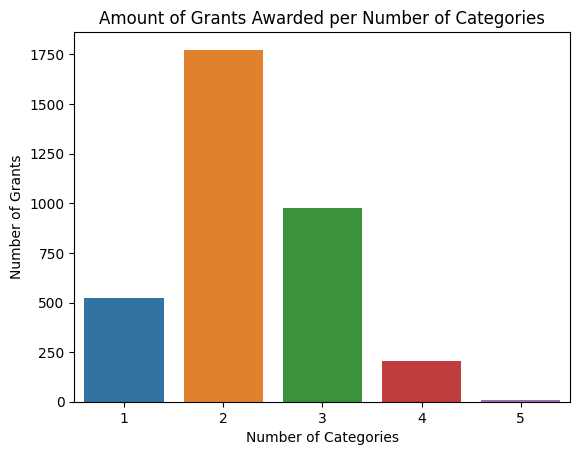

In [ ]:
catbar = sns.barplot(dfnumcategories)
catbar.set_title("Amount of Grants Awarded per Number of Categories")
catbar.set_xlabel("Number of Categories")
catbar.set_ylabel("Number of Grants")

In [ ]:
df[num_categories_per_row==5][['AWARD ID','USASPENDING LINK','RECIPIENT NAME']]

,AWARD ID,USASPENDING LINK,RECIPIENT NAME
774,2202038,https://www.usaspending.gov/award/ASST_NON_220...,KENTUCKY COMMUNITY & TECHNICAL COLLEGE SYSTEM
947,2330886,https://www.usaspending.gov/award/ASST_NON_233...,MONTANA STATE UNIVERSITY
991,2242443,https://www.usaspending.gov/award/ASST_NON_224...,NATIONAL BUREAU OF ECONOMIC RESEARCH INC
994,2227918,https://www.usaspending.gov/award/ASST_NON_222...,"UNIVERSITY OF CALIFORNIA, LOS ANGELES"
1002,2228162,https://www.usaspending.gov/award/ASST_NON_222...,"UNIVERSITY OF CALIFORNIA, DAVIS"
1003,2228135,https://www.usaspending.gov/award/ASST_NON_222...,"UNIVERSITY OF CALIFORNIA, MERCED"
2328,2316584,https://www.usaspending.gov/award/ASST_NON_231...,UNIVERSITY OF ARIZONA
2657,2315809,https://www.usaspending.gov/award/ASST_NON_231...,UNIVERSITY OF HOUSTON SYSTEM
2817,2305283,https://www.usaspending.gov/award/ASST_NON_230...,UNIVERSITY OF MISSOURI SYSTEM
3187,2239550,https://www.usaspending.gov/award/ASST_NON_223...,THE UNIVERSITY OF TEXAS AT EL PASO


In [ ]:
print(df[num_categories_per_row==5]['USASPENDING LINK'][2817])

https://www.usaspending.gov/award/ASST_NON_2305283_4900/
